<a href="https://colab.research.google.com/github/ai-how/GANs/blob/master/DataQuality_SDV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##=====To get SDV working properly, it requires pomegranate to be installed first====##
!pip install pomegranate

     |████████████████████████████████| 17.9MB 211kB/s 
     |████████████████████████████████| 15.3MB 259kB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [ ]:
!pip install sdv
!pip install umap-learn

     |████████████████████████████████| 81kB 5.8MB/s 
     |████████████████████████████████| 102kB 8.0MB/s 
     |████████████████████████████████| 9.5MB 25.3MB/s 
     |████████████████████████████████| 17.9MB 263kB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 5.7MB 55.5MB/s 
     |████████████████████████████████| 1.1MB 29.3MB/s 
     |████████████████████████████████| 22.3MB 75.6MB/s 
     |████████████████████████████████| 9.5MB 37.7MB/s 
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Found existing installation: pomegranate 0.14.5
    Uninstalling pomegranate-0.14.5:
      Successfully uninstalled pomegranate-0.14.5
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:

     |████████████████████████████████| 81kB 6.5MB/s 
     |████████████████████████████████| 1.2MB 20.6MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=ed77b5e698c8ed24a10deee26dffcc926a499ca887550202d8b93a6fd65b4fa3
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=dbe0c43b6cfbe8ff2c138e4d2a5a5a3af94697fc367b2d111372ce3dd6252faa
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent


## Lets fit Synthetic Data Generator using Synthetic Data Vault https://github.com/sdv-dev/CTGAN. Quite impressed with this package as it handles categorical vairables on its own and worked quite well on Adult dataset [used as reference here in this exploration]

In [ ]:
import pandas as pd
import numpy as np
from ctgan import load_demo
from sklearn.model_selection import train_test_split

data = load_demo()

discrete_columns = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
    'income'
]

from ctgan import CTGANSynthesizer

ctgan = CTGANSynthesizer()

##=====Split data in two parts, test will be used=====##
##=====to assess the quality of synthetic data========##

train, test= train_test_split(data, test_size=0.2, random_state=42)

ctgan.fit(train, discrete_columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init 

In [ ]:
synth.shape, train_real.shape, test_real.shape, data.shape

((1000, 6), (26048, 6), (6513, 6), (32561, 15))

In [ ]:
##========For 2-D visualization lets plot dataset using only numerical features=====###

samples = ctgan.sample(1000)
samples[samples.columns.difference(discrete_columns)].head()
synth = samples[samples.columns.difference(discrete_columns)]
train_real = train[train.columns.difference(discrete_columns)]
test_real = test[test.columns.difference(discrete_columns)]


In [ ]:
##========Using concatenated dataset to learn 2-D embedding using UMAP========##

import umap
merged_frame = pd.concat([synth, train_real, test_real], axis=0)
standard_embedding = umap.UMAP(random_state=42).fit_transform(merged_frame)

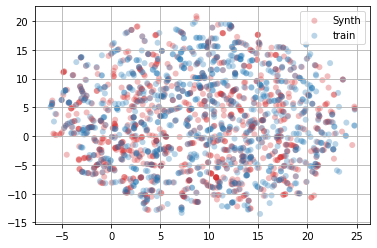

In [ ]:
##=======Lets plot synthetic, train & test split of real dataset========##

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

labels = ['Synth','train', 'test']
color = ['tab:yellow', 'tab:red', 'tab:orange']

idx = [0,1000,26048+2000-26048,26048+2000]

i = 0
x, y = standard_embedding[idx[i]:idx[i+1],0], standard_embedding[idx[i]:idx[i+1],1]

ax1.scatter(x, y, c='tab:red', label=labels[i],
                   alpha=0.3, edgecolors='none')

i = 1
x, y = standard_embedding[idx[i]:idx[i+1],0], standard_embedding[idx[i]:idx[i+1],1]

ax1.scatter(x, y, c='tab:blue', label=labels[i],
                   alpha=0.3, edgecolors='none')

'''i = 2
x, y = standard_embedding[idx[i]:idx[i+1],0], standard_embedding[idx[i]:idx[i+1],1]

ax1.scatter(x, y, c='tab:blue', label=labels[i],
                   alpha=0.3, edgecolors='none')'''

ax1.legend()
ax1.grid(True)

plt.show()

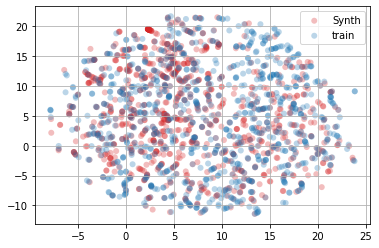

In [ ]:
##=======Lets plot synthetic, train & test split of real dataset========##

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

labels = ['Synth','train', 'test']
color = ['tab:yellow', 'tab:red', 'tab:orange']

idx = [0,1000,26048+2000-26048,26048+2000]

i = 0
x, y = standard_embedding[idx[i]:idx[i+1],0], standard_embedding[idx[i]:idx[i+1],1]

ax1.scatter(x, y, c='tab:red', label=labels[i],
                   alpha=0.3, edgecolors='none')

i = 1
x, y = standard_embedding[idx[i]:idx[i+1],0], standard_embedding[idx[i]:idx[i+1],1]

ax1.scatter(x, y, c='tab:blue', label=labels[i],
                   alpha=0.3, edgecolors='none')

'''i = 2
x, y = standard_embedding[idx[i]:idx[i+1],0], standard_embedding[idx[i]:idx[i+1],1]

ax1.scatter(x, y, c='tab:blue', label=labels[i],
                   alpha=0.3, edgecolors='none')'''

ax1.legend()
ax1.grid(True)

plt.show()

## Data Quality evaluation feature of SDV is very handy to eplore the quality of generated synthetic dataset. For detail refer on type of tests used for evaluation refer https://github.com/sdv-dev/SDV/blob/master/tutorials/evaluation/Evaluating_Synthetic_Data.ipynb  

In [ ]:
from sdv.evaluation import evaluate

evaluate(train_real, test_real)

/usr/local/lib/python3.7/dist-packages/sdmetrics/single_table/multi_single_column.py:84: RuntimeWarning: Mean of empty slice
  return np.nanmean(scores)
/usr/local/lib/python3.7/dist-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[pd.isnull(real_data)] = 0.0
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3093: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
/usr/local/lib/python3.7/dist-packages/sdmetrics/column_pairs/statistical/kl_divergenc

0.8268156730829466

In [ ]:
from sdv.evaluation import evaluate

evaluate(train_real, test_real)

/usr/local/lib/python3.7/dist-packages/sdmetrics/single_table/multi_single_column.py:84: RuntimeWarning: Mean of empty slice
  return np.nanmean(scores)
/usr/local/lib/python3.7/dist-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[pd.isnull(real_data)] = 0.0
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3093: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
/usr/local/lib/python3.7/dist-packages/sdmetrics/column_pairs/statistical/kl_divergenc

0.8244952079602963

## Lets evalute the quality of synthetic data to ensure thats its not one of the two.
* Data Copying
* Over Representation

Research study here suggests a non-parametric method to evaluate the quality of synthetic data generation. https://arxiv.org/pdf/2004.05675.pdf

* Title: A Non-Parametric Test to Detect Data-Copying in Generative Models

In [ ]:
##=======Taken from https://github.com/casey-meehan/data-copying=======##

import numpy as np
from sklearn.neighbors import NearestNeighbors as NN 
from scipy.stats import mannwhitneyu

def Zu(Pn, Qm, T): 
    """
    Extracts distances to training nearest neighbor
    L(P_n), L(Q_m), and runs Z-scored Mann Whitney U-test. 
    For the global test, this is used on the samples within each cell.
    Inputs: 
        Pn: (n X d) np array representing test sample of 
            length n (with dimension d)
        Qm: (m X d) np array representing generated sample of 
            length n (with dimension d) 
        T: (l X d) np array representing training sample of 
            length l (with dimension d)
    Ouptuts: 
        Zu: Z-scored U value. A large value >>0 indicates 
            underfitting by Qm. A small value <<0 indicates.
    """
    m = Qm.shape[0]
    n = Pn.shape[0]

    #fit NN model to training sample to get distances to test and generated samples
    T_NN = NN(n_neighbors = 1).fit(T)
    LQm, _ = T_NN.kneighbors(X = Qm, n_neighbors = 1)
    LPn, _ = T_NN.kneighbors(X = Pn, n_neighbors = 1)

    #Get Mann-Whitney U score and manually Z-score it using the conditions of null hypothesis H_0 
    u, _ = mannwhitneyu(LQm, LPn, alternative = 'less')
    mean = (n * m / 2) - 0.5 #0.5 is continuity correction
    std = np.sqrt(n*m*(n + m + 1) / 12)
    Z_u = (u - mean) / std 
    return Z_u

## What this test does: It looks for samples in the generated dataset and check if they are on an average closer to training dataset in comparison to data from real distribution (test dataset here) thereby indicating data copying.

> Taken from paper:
 ZU<<0 implies
data-copying, ZU >>0 implies underfitting

In [ ]:
##====Epchs=1======##
Zu(test_real.sample(1000), train_real.sample(1000), train_real.sample(1000))

-0.9695139518586495

In [ ]:
##====Training with default epochs======##
Zu(test_real.sample(1000), train_real.sample(1000), train_real.sample(1000))

-0.8537794096602589

## While the above test may indicate underfitting but it may still be data copying in certain subset of the data which will not be evident. To overcome this limitation, the authors proposed to run the hypothesis test after clustering the training dataset (referred as cells).

In [ ]:
##=======Taken from https://github.com/casey-meehan/data-copying=======##

def C_T(Pn, Pn_cells, Qm, Qm_cells, T, T_cells, tau):
    """Runs C_T test given samples and their respective cell labels. 
    The C_T statistic is a weighted average of the in-cell Zu statistics, weighted
    by the share of test samples (Pn) in each cell. Cells with an insufficient number 
    of generated samples (Qm) are not included in the statistic. 
    Inputs: 
        Pn: (n X d) np array representing test sample of length
            n (with dimension d)
        Pn_cells: (1 X n) np array of integers indicating which 
            of the k cells each sample belongs to 
        
        Qm: (m X d) np array representing generated sample of 
            length n (with dimension d) 
        Qm_cells: (1 X m) np array of integers indicating which of the 
            k cells each sample belongs to
        T: (l X d) np array representing training sample of 
            length l (with dimension d)
        T_cells: (1 X l) np array of integers indicating which of the 
            k cells each sample belongs to
        tau: (scalar between 0 and 1) fraction of Qm samples that a
            cell needs to be included in C_T statistic. 
    Outputs:
        C_T: The C_T statistic for the three samples Pn, Qm, T
    """

    m = Qm.shape[0]
    n = Pn.shape[0]
    k = np.max(np.unique(T_cells)) + 1 #number of cells

    #First, determine which of the cells have sufficient generated samples (Qm(pi) > tau) 
    labels, cts = np.unique(Qm_cells, return_counts = True) 
    Qm_cts = np.zeros(k)
    Qm_cts[labels.astype(int)] = cts #put in order of cell label 
    Qm_of_pi = Qm_cts / m 
    Pi_tau = Qm_of_pi > tau #binary array selecting which cells have sufficient samples 

    #Get the fraction of test samples in each cell Pn(pi) 
    labels, cts = np.unique(Pn_cells, return_counts = True)  
    Pn_cts = np.zeros(k)
    Pn_cts[labels.astype(int)] = cts #put in order of cell label 
    Pn_of_pi = Pn_cts / n 

    #Now get the in-cell Zu scores 
    Zu_scores = Zu_cells(Pn, Pn_cells, Qm, Qm_cells, T, T_cells)

    #compute C_T: 
    C_T = Pn_of_pi[Pi_tau].dot(Zu_scores[Pi_tau])/np.sum(Pn_of_pi[Pi_tau])

    return C_T

def Zu_cells(Pn, Pn_cells, Qm, Qm_cells, T, T_cells): 
    """Collects the Zu statistic in each of k cells. 
    There should be >0 test (Pn) and train (T) samples in each of the cells. 
    Inputs: 
        Pn: (n X d) np array representing test sample of length
            n (with dimension d)
        Pn_cells: (1 X n) np array of integers indicating which 
            of the k cells each sample belongs to 
        
        Qm: (m X d) np array representing generated sample of 
            length n (with dimension d) 
        Qm_cells: (1 X m) np array of integers indicating which of the 
            k cells each sample belongs to
        T: (l X d) np array representing training sample of 
            length l (with dimension d)
        T_cells: (1 X l) np array of integers indicating which of the 
            k cells each sample belongs to
    Outputs: 
        Zus: length k np array, where entry i indicates the Zu score for cell i
    """
    #assume cells are labeled 0 to k-1
    k = len(np.unique(Pn_cells))
    Zu_cells = np.zeros(k)
    
    #get samples in each cell and collect Zu 
    for i in range(k): 
        Pn_cell_i = Pn[Pn_cells == i]
        Qm_cell_i = Qm[Qm_cells == i]
        T_cell_i = T[T_cells == i]
        #check that the cell has test and training samples present 
        if len(Pn_cell_i) * len(T_cell_i) == 0: 
            raise ValueError("Cell {:n} lacks test samples and/or training samples. Consider reducing the number of cells in partition.".format(i))

        #if there are no generated samples present, add a 0 for Zu. This cell will be excluded in \Pi_\tau 
        if len(Qm_cell_i) > 0: 
            Zu_cells[i] = Zu(Pn_cell_i, Qm_cell_i, T_cell_i)
        else: 
            Zu_cells[i] = 0 
            print("cell {:n} unrepresented by Qm".format(i))

    return Zu_cells

In [ ]:
from sklearn.cluster import KMeans

n_clusters = 5

train_real_temp = train_real.sample(1000)
test_real_temp = test_real.sample(1000)

KM_clf = KMeans(n_clusters).fit(train_real_temp)
Pn_labels = KM_clf.predict(train_real_temp)
Qm_labels = KM_clf.predict(synth)
T_labels = KM_clf.predict(test_real_temp)

In [ ]:
##======With epochs = 1=========##
##=====Indicating underfit======##

C_T(train_real_temp, Pn_labels, synth, Qm_labels, test_real_temp, T_labels, .1) ## Higher value indicate underfit and lower indicated data copying

2.796075202278293

In [ ]:
##======training with default epochs==============##
##=====Indicating no underfit & data copying======##

C_T(train_real_temp, Pn_labels, synth, Qm_labels, test_real_temp, T_labels, .1)

0.9301053588920851

## Consolidation of data quality evaluation of GAN based synthetic generation testing using its local and global variants. Training model with its default setting yileds better quality of data (as is evident below)

 ---

Table illustrating quality of data generation

Training with 1 epoch  | Training with default 
-------------------|------------------
Local test , -.96       | Local test , -.85 
Global test, 2.79       | Global test, .93 

---